###  Created by Luis A. Sanchez-Perez (alejand@umich.edu)

## Why not regularize the bias/intercept term?

In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Builds simulated dataset
rnd.seed(1)
negative = 5 + 5 * rnd.rand(10)
positive = 15 + 5 * rnd.rand(10)
x = np.hstack((negative,positive)).reshape(-1,1)
poly = PolynomialFeatures(degree=1)
poly.fit(x)
X = poly.transform(x)
y = np.hstack((np.zeros(10),np.ones(10)))

### Useful functions

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
def compute_cost(w,X,y,reg,bias_reg=False):
    h = sigmoid(X.dot(w))
    loglikelihood = sum([np.log(prob) if label else np.log(1-prob) for prob,label in zip(h,y)]) 
    objective = reg*(w**2).sum() if bias_reg else reg*(w[1:]**2).sum()
    loglikelihood -= objective
    return -loglikelihood

In [5]:
def compute_grad(w,X,y,reg,bias_reg=False):
    h = sigmoid(X.dot(w))
    grad = (X.T).dot(h - y)
    objective = 2*reg*w if bias_reg else np.concatenate(([0],2*reg*w[1:]))
    grad += objective
    return grad

In [6]:
def show_effect(X,y,count=9, max_reg=10):
    # Builds regularization values
    reg = np.linspace(0,max_reg,count)
    # Creates axes    
    s = np.sqrt(count)
    m = int(np.floor(s))
    n = int(np.ceil(s))
    fig, axes = plt.subplots(n,m,)
    fig.set_size_inches(3*n,3.5*m)
    fig.subplots_adjust(hspace=0.5)
    op = {'gtol': 1e-8}
    for i,ax in enumerate(axes.ravel()):
        if i < count:
            w0 = rnd.rand(2)
            # Estimate weights (including regularizing w0) 
            result = opt.minimize(compute_cost, w0, method = 'L-BFGS-B',
                                  jac = compute_grad, 
                                  args = (X,y,reg[i],True), 
                                  options = op)
            w = result.x
            ax.scatter(X[:,1],y,c=y)
            boundary = -w[0]/w[1]
            l1 = ax.plot([boundary, boundary],[0,1],'--k')            
            # Estimate weights (not regularizing w0)
            result = opt.minimize(compute_cost, w0, method = 'L-BFGS-B',
                                  jac = compute_grad, 
                                  args = (X,y,reg[i],False), 
                                  options = op)
            w = result.x
            ax.scatter(X[:,1],y,c=y)
            boundary = -w[0]/w[1]
            l2 = ax.plot([boundary, boundary],[0,1],'-k')
            ax.set_title('lambda=%.1lf' % reg[i])
            ax.set_xlabel('x')
        else:
            fig.delaxes(ax)

### Show the effect of regularizing bias term

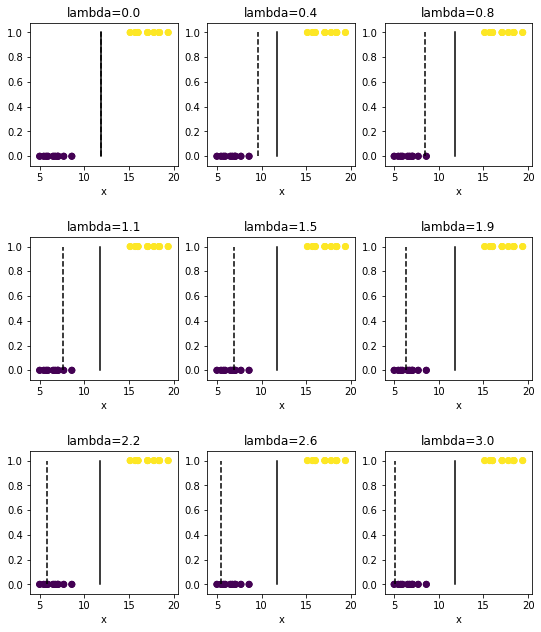

In [7]:
show_effect(X,y,max_reg=3)